1. x Test daten abspeichern und hier einlesen
2. x Ereigniskenndaten einlesen von csv
3. x zu den listenobjekten jeweils eventdaten hinzufügen (Dauer, hN, imax_60, Jährlichkeit)
4. Benchmark eventsauswählen
5. x load in_scaler und out_scaler
6. x testdaten sequenzieren und normalisieren
7. daten vorhersagen
8. Auswahl plotten mit delta time
    - wie plotten? evtl niederschlag mit balken von oben und predictions + actual ganglinie von unten
    - ereigniss kenndaten angeben (Dauer, hN, imax_60, Jährlichkeit)
9. x Scatterplot mit Evendaten

Auswertung aller Sequencen
- MAE
- RMSE
- Scatterplott Actual vs Fitted
- Boxplot mit quantilen für jeden Vorhersagezeitschritt
- siehe Plots burrichter




In [1]:
# Load Relevant Libraries, the model and the test data
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import joblib
import pickle
import os
from modules.sequence_and_normalize import sequence_data, sequence_sample_random, sequence_list
from sklearn.preprocessing import MinMaxScaler


# Assign all relevant paths
model_folder = '05_models\\Gievenbeck_SingleNode_LSTM_20240328'
model_name = "Gievenbeck_SingleNode_LSTM_20240328"
model_path = os.path.join(model_folder, f'{model_name}.json')
weights_path = os.path.join(model_folder, f'{model_name}.weights.h5')
in_scaler_path = os.path.join(model_folder, 'in_scaler.pkl')
out_scaler_path = os.path.join(model_folder, 'out_scaler.pkl')
test_data_path = os.path.join(model_folder, 'test_data')
# Saving model design to JSON

# load json and create model
json_file = open(model_path, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_path)

# Load the scalers
in_scaler = joblib.load(in_scaler_path)
out_scaler = joblib.load(out_scaler_path)

# Load the test data
with open(test_data_path, 'rb') as file:
    test_data = pickle.load(file)

print("Loaded model from disk")

Loaded model from disk


In [2]:
# Load events data
events_df = pd.read_csv('02_input_data/events_FMO.csv')

# sequence data to list structure
lag = int(3 * 60 / 5)
delay = 0
p_steps = 6

in_vars=['duration', 'p']
out_vars=['Q_out']

seq_test = sequence_list(test_data, in_vars=in_vars, out_vars=out_vars, in_scaler=in_scaler, 
                                  out_scaler=out_scaler, lag=lag, delay=delay, prediction_steps=p_steps)


In [11]:
# Print all Event meta data 
i=1
for obj in seq_test:
    print(i, obj[0])
    i += 1


1 {'name': 'Gievenbeck_2016-02-22 03 40 00_hN12 65', 'duration': 765, 'total precipitation': 12.649992823600769, 'max intensity': 15.83999605178833, 'intervall': 5, 'Ereignis': 'Aufgezeichnet'}
2 {'name': 'Gievenbeck_2014-07-24 13 45 00_hN11 22', 'duration': 310, 'total precipitation': 11.21999523540338, 'max intensity': 54.143999862670896, 'intervall': 5, 'Ereignis': 'Aufgezeichnet'}
3 {'name': 'Gievenbeck_e2_T20D20', 'duration': 255, 'total precipitation': 24.099995930989582, 'max intensity': 156.2400100708008, 'intervall': 5, 'Ereignis': 'Euler Typ 2'}
4 {'name': 'Gievenbeck_e2_T3D90', 'duration': 325, 'total precipitation': 23.0799986521403, 'max intensity': 94.72800750732422, 'intervall': 5, 'Ereignis': 'Euler Typ 2'}
5 {'name': 'Gievenbeck_e2_T3D1440', 'duration': 1675, 'total precipitation': 47.109984089930855, 'max intensity': 93.36000716686249, 'intervall': 5, 'Ereignis': 'Euler Typ 2'}
6 {'name': 'Gievenbeck_e2_T2D540', 'duration': 775, 'total precipitation': 32.5499846140543

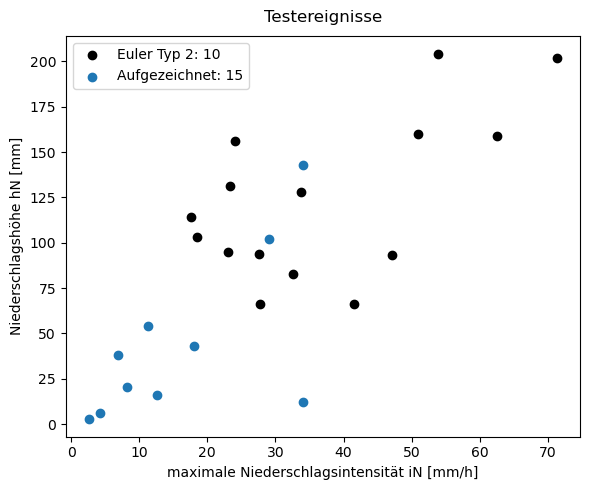

In [6]:
# Extract total precipitation and max intensity from seq_test
e2_precipitation = [obj[0]['total precipitation'] for obj in seq_test if obj[0]['Ereignis'] == 'Euler Typ 2']
e2_intensity = [obj[0]['max intensity'] for obj in seq_test if obj[0]['Ereignis'] == 'Euler Typ 2']

aufgezeichnet_precipitation = [obj[0]['total precipitation'] for obj in seq_test if obj[0]['Ereignis'] == 'Aufgezeichnet']
aufgezeichnet_intensity = [obj[0]['max intensity'] for obj in seq_test if obj[0]['Ereignis'] == 'Aufgezeichnet']

# Plot events precipitation and intensity in scatterplot
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(e2_precipitation, e2_intensity, 'o', color='black', label='Sample')
ax.scatter(aufgezeichnet_precipitation, aufgezeichnet_intensity, marker='o',  label='Events')

ax.set_xlabel('maximale Niederschlagsintensität iN [mm/h]')
ax.set_ylabel('Niederschlagshöhe hN [mm]')
ax.set_title('Testereignisse', pad=10)
ax.legend(labels=['Euler Typ 2: {}'.format(len(aufgezeichnet_precipitation)), 'Aufgezeichnet: {}'.format(len(e2_precipitation))])
plt.tight_layout()


In [ ]:


Predict = model.predict(x_test)
Predict_revert = out_scaler.inverse_transform(Predict)
y_revert = out_scaler.inverse_transform(y_test_x)

n = int(len(x_test) / 3)
Predict_revert[n]
y_revert[n]
Predict[n]
y_test[n]
# Plotting the predicted and actual values
plt.plot(Predict_revert[n], label='Predicted')
plt.plot(y_revert[n], label='Actual')
plt.ylim(bottom=0)  # Set y-axis to start from zero
plt.legend()
plt.show()